In [1]:
# IMPORTS
import pandas as pd
from math import sqrt
from random import seed
from random import randrange
import sys

In [2]:
seed(2)
# DATA
data = pd.read_csv("./data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Cleaning Data
data.drop(['id'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


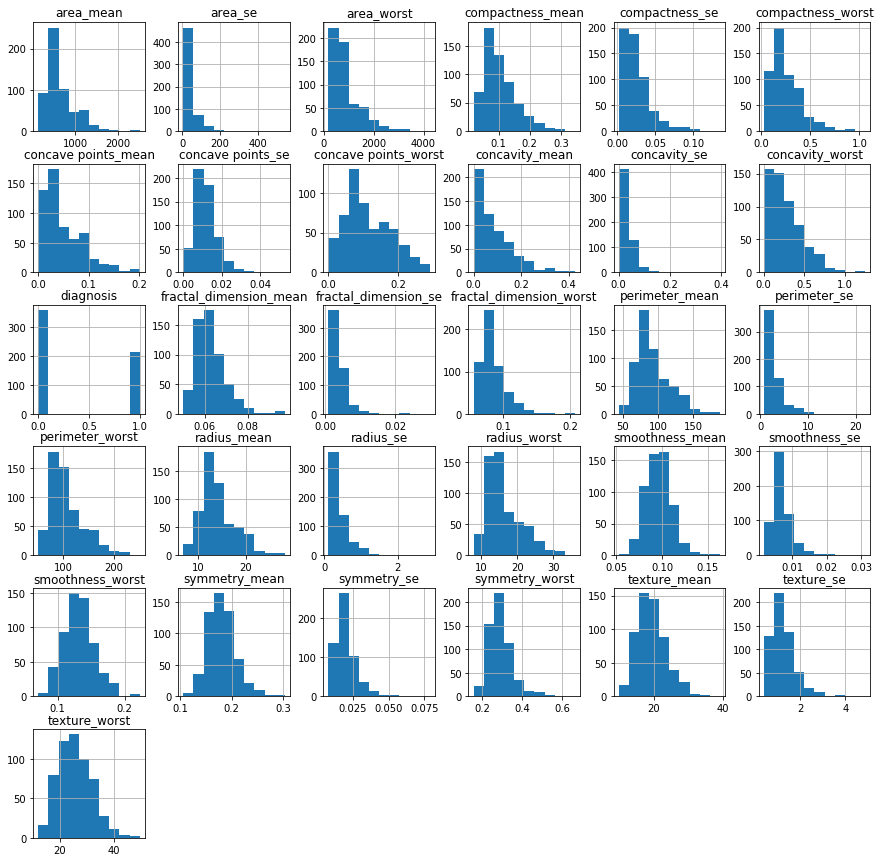

In [4]:
 pd.DataFrame.hist(data, figsize = [15,15]);

In [5]:
## Decision Tree
def build_tree(dataset, min_sample_size, max_depth):
    random_index = randrange(1, len(dataset[0])) # 0 index is the label
    root = build_node(dataset, random_index)
    build_children(root, max_depth, min_sample_size, 1) 
    return root

# Build a node. A node contains: index, value, groups (this will be removed by children)
def build_node(dataset, index):
    class_labels = list(set([row[0] for row in dataset]))
    node_index, node_value, best_gini_gained, node_groups = -1, -1, -1, None
    for row in dataset:
        groups = split_groups(index, row[index], dataset)
        gini_gained = calc_gini_gained(groups, class_labels)
        if gini_gained > best_gini_gained:
            node_index = index
            node_value = row[index]
            best_GI_score = gini_gained
            node_groups = groups
    return {'index': node_index, 'value': node_value, 'groups': node_groups}    

# Split to left and right by value
def split_groups(index, value, dataset):
    left = []
    right = []
    for row in dataset:
        if row[index] < value: 
            left.append(row)
        else: 
            right.append(row)
    return left, right

# Calculate impurity of parent = (1 - sum(p^2)) for each class label
def calc_gini_parent(groups, class_labels):
    all_rows = [row for group in groups for row in group]
    size = len(all_rows)
    score = 0
    for label in class_labels:
        p = [row[0] for row in all_rows].count(label) / size
        score += p * p;
    return 1 - score

# Calculate impurity for the split = parent impurity - sum of child impurities
def calc_gini_gained(groups, classes):
    parent_size = float(sum([len(group) for group in groups]))
    gini_gained = calc_gini_parent(groups, classes)
    for group in groups:
        group_size = float(len(group))
        # avoid divide by zero
        if group_size == 0:
            continue
        group_score = 0.0 # accumulate score of each group
        for class_val in classes:
            p = [row[0] for row in group].count(class_val) / group_size
            group_score += p * p
        # weight the group score by its relative size
        gini_gained -= (1.0 - group_score) * (group_size / parent_size)
    return gini_gained

def build_children(node, max_depth, min_size, depth): 
    left, right = node['groups'] # Extract groups information from parent node
    del node['groups'] # Remove groups
    
    # If parent node is empty
    if not left or not right: 
        node['left'] = node['right'] = build_terminal_node(left + right)
        return 
    
    # if max depth is reached
    if depth >= max_depth:
        node['left'] = build_terminal_node(left)
        node['right'] = build_terminal_node(right)
        return 
    
    # For left child: 
    ## Too little sample
    if (len(left) <= min_size):
        node['left'] = build_terminal_node(left)
    else:
        random_index = randrange(1, len(left[0])) 
        node['left'] = build_node(left, random_index)
        build_children(node['left'], max_depth, min_size, depth + 1)
    if (len(right) <= min_size):
        node['right'] = build_terminal_node(right)
    else:
        random_index = randrange(1, len(right[0]))
        node['right'] = build_node(right, random_index)
        build_children(node['right'], max_depth, min_size, depth + 1)

def build_terminal_node(group):
    labels = [row[0] for row in group]
    return max(set(labels), key=labels.count)

def predict_from_tree(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict): # check if it's terminal
            return predict_from_tree(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict): # check if it's terminal
            return predict_from_tree(node['right'], row)
        else:
            return node['right']

In [13]:
## Forest
def build_forest(train, n_trees, max_depth=5, min_size=1, sample_ratio=1):
    trees = []
    for i in range(n_trees):
        sample = []
        n_sample = len(train) * sample_ratio
        while len(sample) < n_sample:
            index = randrange(len(train))
            sample.append(train[index])
        tree = build_tree(sample, min_size, max_depth)
        trees.append(tree)
    return trees

def random_forest(train, test, n_trees=5, max_depth=5, min_size=1, sample_ratio=1):
    print(len(train), len(test), n_trees, max_depth, min_size, sample_ratio)
    trees = build_forest(train, n_trees, max_depth=5, min_size=1, sample_ratio=1)
    test_labels = [row[0] for row in test]
    predictions = []
    for row in test:
        row_prediction = [predict_from_tree(tree, row) for tree in trees]
        predictions.append(max(set(row_prediction), key=row_prediction.count))
    return score_accuracy(test_labels, predictions)

def score_accuracy(actual, predictions):
    correct = 0; 
    for i in range(len(actual)):
        if actual[i] == predictions[i]:
            correct += 1
    return correct * 100.0 / len(actual)

In [17]:
## Evaluation
# Split data in particular ratio for train and test
def split_data(data, ratio=0.7):
    shuffle_df = data.sample(frac=1)
    train_size = int(ratio * len(data))
    train_set = shuffle_df[:train_size]
    test_set = shuffle_df[train_size:]
    return train_set, test_set

def cross_validation_split(dataframe, n_folds):
    dataframe_split = list()
    dataframe_copy = dataframe
    for i in range(n_folds):
        left_fold = n_folds - i
        fold_fraction = float(1/left_fold)
        fold = dataframe_copy.sample(frac=fold_fraction)
        dataframe_split.append(fold)
        dataframe_copy = dataframe_copy.drop(fold.index)
    return dataframe_split

def evaluate_algorithm(dataframe, n_folds, algo, *args):
    results = []
    folds = cross_validation_split(dataframe, n_folds)
    for i in range(len(folds)):
        l_without_i = folds[:i] + folds[(i + 1):]
        train = pd.concat(l_without_i)
        test = folds[i]
        results.append(algo(train.values.tolist(), test.values.tolist(), *args))
    return sum(results) / len(results)



train, test = split_data(data,0.7)
print("data shape:", data.shape)
print("train count:", train.shape)
print("test count:", test.shape)

train_list = train.values.tolist()
test_list = test.values.tolist()
data_list = data.values.tolist()

print("random forest: ", random_forest(train_list, test_list, 5))

# # split data in folds for multiple decision trees
# n_folds = 5

# dataframe_split = cross_validation_split(data, n_folds)
# print("split data in ",len(dataframe_split), "folds")

evaluate_algorithm(data, 5, random_forest)

data shape: (569, 31)
train count: (398, 31)
test count: (171, 31)
398 171 5 5 1 1
random forest:  90.05847953216374
455 114 5 5 1 1
455 114 5 5 1 1
455 114 5 5 1 1
455 114 5 5 1 1
456 113 5 5 1 1
[93.85964912280701, 92.98245614035088, 86.84210526315789, 90.35087719298245, 91.15044247787611]


91.03710603943486